<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/pumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Pumps
#@markdown Introduction to pumps in oil and gas industry
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

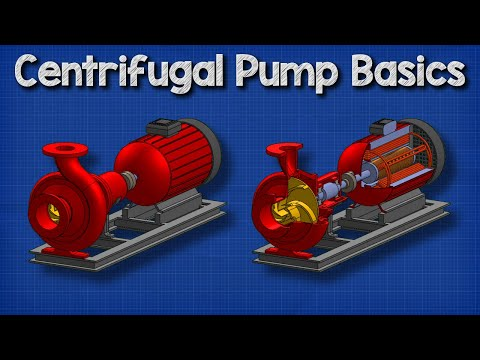

In [1]:
#@title  Pumps in oil and gas industry
#@markdown Introduction to centrifugal pumps
from IPython.display import YouTubeVideo
YouTubeVideo('XpcCUtYzwy0', width=600, height=400)

#Pump calculations uing NeqSim

In [4]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, pump

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("n-nonane", 1.0)

fluid1.setTemperature(28.15, "C")
fluid1.setPressure(1.0, "bara")
fluid1.setTotalFlowRate(135.0, "m3/hr")
# demonstration of setting up a simple process calculation

clearProcess()
stream1 = stream(fluid1)
pump1 = pump(stream1, 11.0)
runProcess()

print("temperature out of pump ", pump1.getOutStream().getTemperature()-273.15, " °C")
print("pump power ", pump1.getPower()/1e3, " kW")

temperature out of pump  28.339074674117796  °C
pump power  28.67389873839449  kW
